In [1]:
from config import *

In [2]:
print(f'{year}年{month}月')

2020年3月


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../py')
import db

In [4]:
conn=db.get_conn()

In [5]:
stat_data = pd.read_sql(sql='select * from MonthlyStats order by Month', con=conn)
stat_data

,Month,Salary_Mean,Salary_Median,JD_Count,HeadCount
0,201906,12990,12000,98669,323172
1,201907,13209,12000,94918,308802
2,201908,13388,12500,94569,303830
3,201909,13421,12500,90804,292998
4,201910,13337,12500,87620,284579
5,201911,13451,12500,84685,277672
6,201912,13554,12500,84141,276906
7,202001,13632,12500,78009,258456
8,202002,13716,12500,71577,238465
9,202003,13820,12500,66103,219033


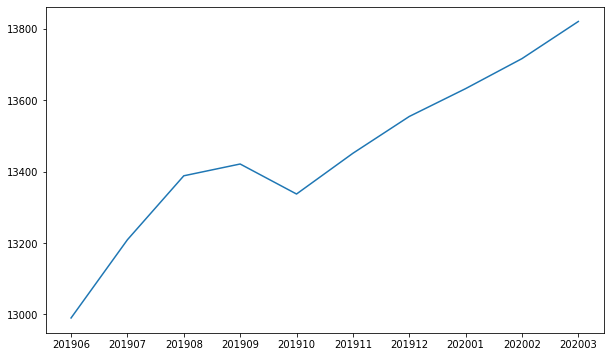

In [6]:
plt.figure(figsize=(10,6))
plt.plot("Month","Salary_Mean",data=stat_data)
plt.show()

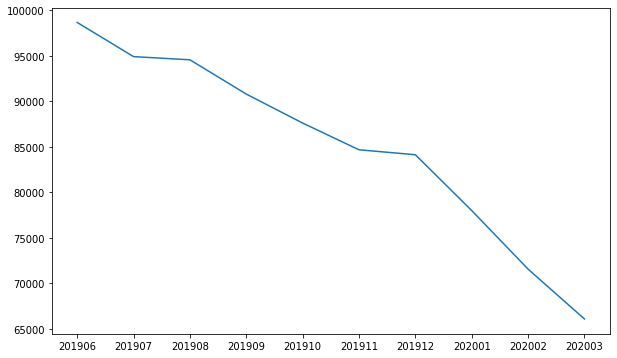

In [7]:
plt.figure(figsize=(10,6))
plt.plot("Month","JD_Count",data=stat_data)
plt.show()

[1.0]


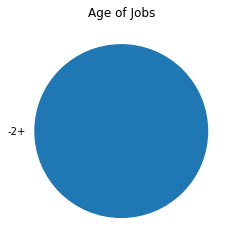

In [8]:
counts=[]
percentages=[]
count1=conn.execute(f"select COUNT(1) from _{year}{month:02}").fetchall()[0][0]
counts.append(count1)

for i in range(1,month-6+1):
    i_count=conn.execute(f"select COUNT(1) from _{year}{month:02} a inner join _{year}{month-i:02} b on a.job_id=b.job_id").fetchall()[0][0]
    counts.append(i_count)
    percentages.append((counts[i-1]-i_count)/counts[0])
    
percentages.append(counts[-1]/counts[0])
print(percentages)

labels=[]
for i in range(1,month-6+1):
    labels.append(i)
labels.append(f"{str(month-6+1)}+")

plt.pie(percentages, labels=labels)
plt.title("Age of Jobs")
plt.show()

# 按照职能统计平均工资

In [46]:
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000", con=db.get_conn())

In [47]:
data_original.shape

(65997, 122)

In [48]:
data_career=data_original.groupby(by='career').agg(
    salary=pd.NamedAgg(column='monthly_salary', aggfunc='mean')
)

In [49]:
data_career['salary']=data_career['salary'].astype(int)

In [50]:
data_career.sort_values(by='salary', ascending=False)

,salary
career,
光学算法,34250
CT重建,23250
规划算法工程师,23057
机器学习,22773
系统架构师,22724
ADAS,20624
区块链,19701
SLAM,19498
图像算法,19198
